In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df=pd.read_csv(r"C:\Users\G Supriya\OneDrive\Desktop\vivek\Prodigy_DS_internship\Task2\Titanic-Dataset.csv")

In [73]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# <b> Exploratory Data Analysis

In [76]:

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [77]:
df["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [78]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

## Filling the Missing Values of Age with their mean value

In [79]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

C:\Users\G Supriya\AppData\Local\Temp\ipykernel_6940\2595122914.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(),inplace=True)


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Dropping the Cabin Column since it contains the more missing values about 80%

In [81]:
df.drop(columns=["Cabin"],inplace=True)

In [82]:
df.shape

(891, 11)

# Filling the missing values of Embarked Column with their mode(most frequently repeating value)

In [83]:
df["Embarked"].fillna(df["Embarked"].mode,inplace=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [85]:
df.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# <b> Data Visualization Techniques

In [86]:
gender_count=df["Gender"].value_counts()

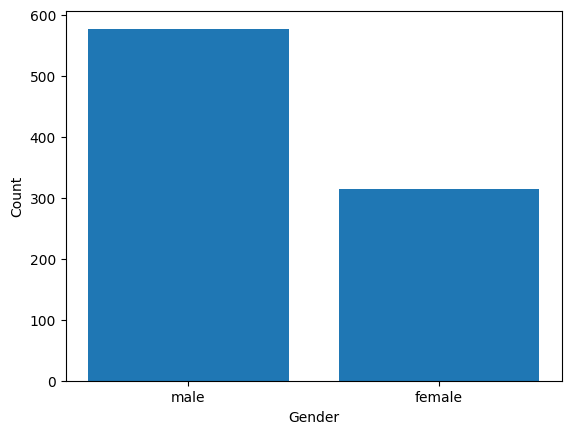

In [87]:
plt.bar(gender_count.index,gender_count.values)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Distribution of Gender Vs Survival

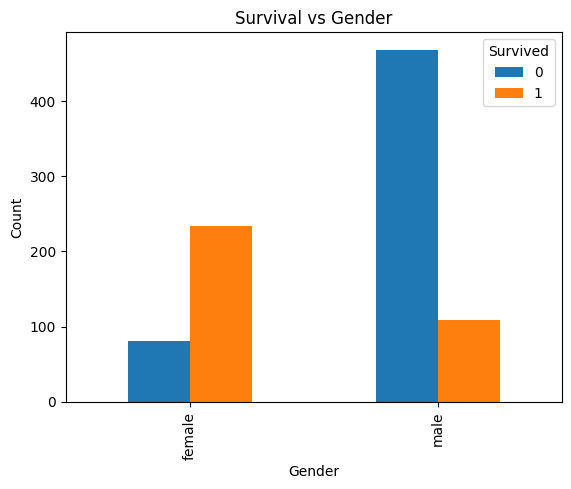

In [88]:
survive_gender=df.groupby(["Gender","Survived"]).size().unstack()   
survive_gender.plot(kind='bar', stacked=False)
plt.title("Survival vs Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [89]:
df["Age"] = pd.to_numeric(df["Age"], errors='coerce')

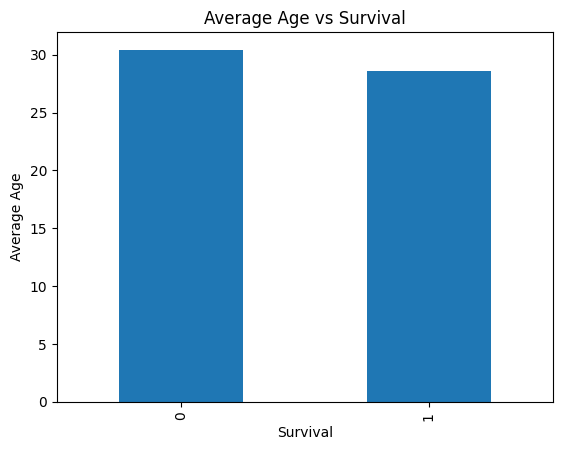

In [90]:
avg_age_survived=df.groupby("Survived")["Age"].mean()
avg_age_survived.plot(kind='bar')
plt.title("Average Age vs Survival")
plt.xlabel("Survival")
plt.ylabel("Average Age")
plt.show()

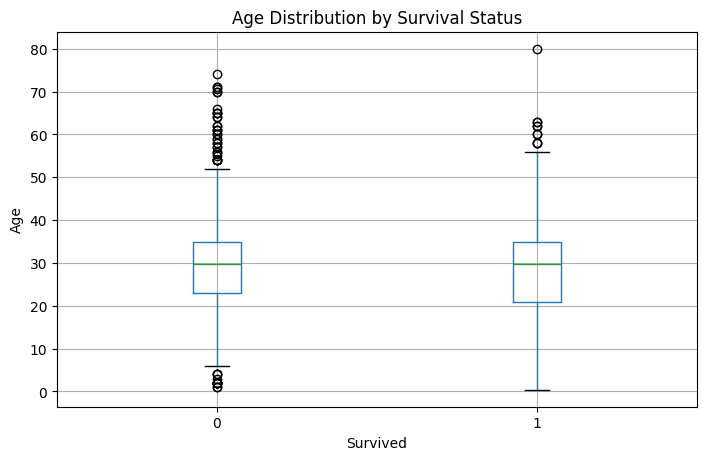

In [91]:

df.boxplot(column="Age", by="Survived", figsize=(8, 5))
plt.title("Age Distribution by Survival Status")
plt.suptitle("")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()


In [92]:
embarked_survived=df.groupby(["Embarked","Survived"]).size().unstack()

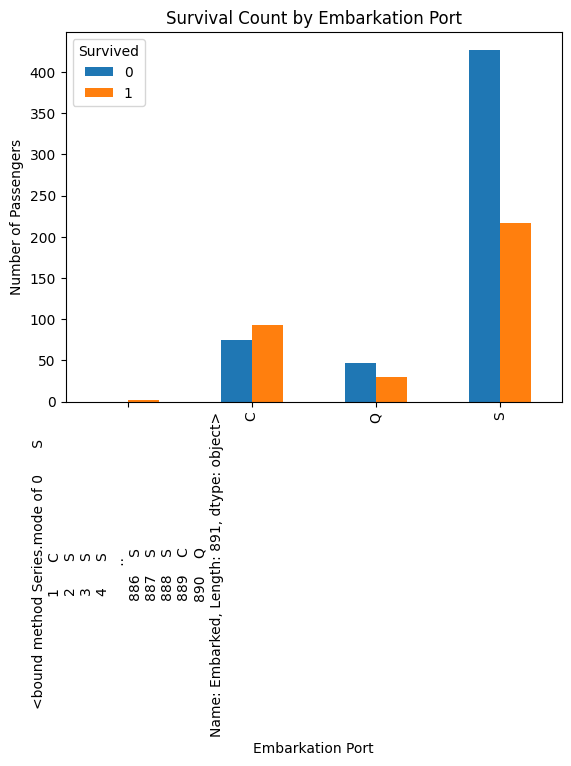

In [93]:
embarked_survived.plot(kind="bar",stacked=False)
plt.title("Survival Count by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Number of Passengers")
plt.show()

# <b> Feature Importance

# Since the passengerID and Name are unique that doesnot impact the performance of the model so we are dropping the columns 

In [94]:
df.drop(columns=["PassengerId","Name","Ticket"],inplace=True)

In [95]:
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [96]:
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [97]:
pclass_survived=df.groupby(["Pclass","Survived"]).size().unstack()

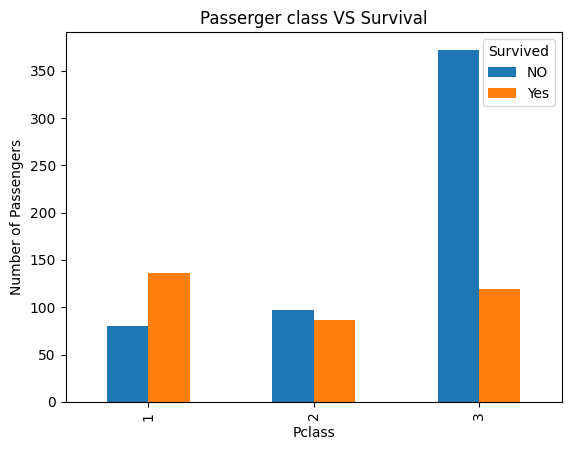

In [98]:
pclass_survived.plot(kind="bar",stacked=False)
plt.ylabel("Number of Passengers")
plt.title("Passerger class VS Survival")
plt.legend(title="Survived",labels=["NO","Yes"])
plt.show()

# Correlation between the different categorical features

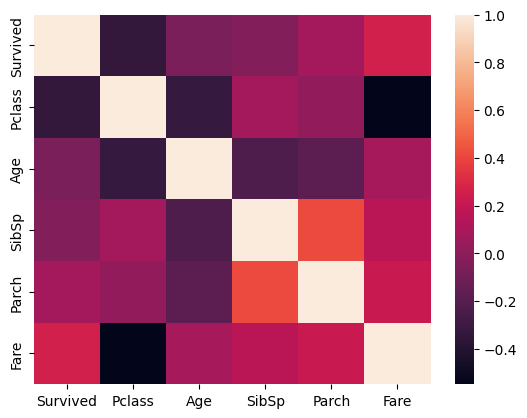

In [99]:
corr_matrix = df.select_dtypes(exclude="object").corr()
sns.heatmap(corr_matrix)
plt.show()

# Converting the Categoical Features in to numerical features using Label Encoder

In [100]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler

# List of categorical columns to encode
categorical_cols = ["Gender"]

# Apply label encoding and update the DataFrame
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [102]:
numerical_cols=["Age","Fare"]
scaler=StandardScaler()
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

In [103]:
df.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.592481,1,0,-0.502445,S
1,1,1,0,0.638789,1,0,0.786845,C
2,1,3,0,-0.284663,0,0,-0.488854,S
3,1,1,0,0.407926,1,0,0.420730,S
4,0,3,1,0.407926,0,0,-0.486337,S


In [104]:
df["Age"] = df["Age"].astype(float)

In [105]:
df.drop(columns=["Embarked"],inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 52.3+ KB


# Splitting the Dataset 

In [106]:
y=df["Survived"]
features=df.columns[1:]
X=df[features]

In [107]:
X.head()

,Pclass,Gender,Age,SibSp,Parch,Fare
0,3,1,-0.592481,1,0,-0.502445
1,1,0,0.638789,1,0,0.786845
2,3,0,-0.284663,0,0,-0.488854
3,1,0,0.407926,1,0,0.420730
4,3,1,0.407926,0,0,-0.486337


In [108]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# model Selection and Training

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

# Logistic Regression

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [123]:
model=LogisticRegression(random_state=42)
model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [124]:
y_pred=model.predict(X_test)

In [125]:
comparing_df=pd.DataFrame({"Actual values":y_test,"Predicted values":y_pred})
comparing_df.head()

,Actual values,Predicted values
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1


In [126]:
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [127]:
conf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",conf_matrix)

Confusion matrix:
 [[92 13]
 [21 53]]


# Randaom forest Classifier

In [128]:
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [129]:
y_pred=model.predict(X_test)

In [130]:
comparing_df=pd.DataFrame({"Actual values":y_test,"Predicted values":y_pred})
comparing_df.head()

,Actual values,Predicted values
709,1,0
439,0,0
840,0,0
720,1,1
39,1,0


In [131]:
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [132]:
conf_matrix=confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",conf_matrix)

Confusion matrix:
 [[93 12]
 [20 54]]
